In [50]:
import numpy 


In [ ]:
import json
import requests # For making HTTP requests to the Quokka
# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

json (java script object notation) is a text based document type format that is used for exchange and storage of data. 
This is how messages are sent and recieved from the quokka - they must be in the format of a dictionary, where the operation must be specified (e.g. setting the circuit, setting the initial state, applying a gate e.t.c.). depending on the operation, the rest can vary e.g. if a gate is applied, then the parameters and the specific gate name must be defined.

In [ ]:
my_quokka = 'theq-adc1cf'
my_quokka = 'quokka1'

In [ ]:
# create_ciruit (turn on your quantum computer for a qubit array between qubits = 1 and qubits = 30)
# Initial_state is a integer to initalise all qubit,
# most often initial_state = 0.

        def create_circuit(qubits,initial_state):
            #creation of first json object to send to quokka to create the circuit
            data = { 
                'operation': 'create_circuit',
                'num_qubits': qubits
            }
            result = requests.post(req_str, json=data) #here we are inputting the json data into the quokka and storing result in 'result'
            json_obj = json.loads(result.content) #this uploads the results into a json object, which is a dictionary with keys 'result' and 'error_code'
            reg_id = json_obj['result'] #this extracts the value of 'result' from the dictionary that is the json object, which is the register id for the circuit we just created. We will use this register id to refer to this circuit in future operations.

            #creation of second json object to send to quokka to set the initial state of the circuit
            data = {
                'operation': 'set_state', 
                'register': reg_id, #using the reg_id that was created in the first step of the function to specify which circuit we are setting the state for
                'state': initial_state, #the initial state of the circuit, which is an integer that specifies the state of all qubits. For example, if initial_state = 0, then all qubits are in the |0> state. If initial_state = 5, then the first and third qubits are in the |1> state and the rest are in the |0> state.
                'complex_value': {'re': 1, 'im': 0} #this specifies the complex value of the state, which is 1 for the initial state and 0 for all other states. This is because we are initializing the circuit to a specific state, so that state has amplitude 1 and all other states have amplitude 0.
            }
            result = requests.post(req_str, json=data, verify=False) #here we are inputting the json data into the quokka and storing result in 'result'. We are also setting verify=False to suppress warnings about insecure requests, since we are not using HTTPS.
            return reg_id #returning the register id for the circuit we just created and set the initial state for, so that we can refer to this circuit in future operations.

        # Gates.  gate_name and params are specified from the list above
        # Gates only return 'True' and 'False' to indicate if they were successsfully applied
        def gate(register_id, gate_name, params):  #params are the parameters for the gate. For example, for a CNOT gate, params would be {'control': 0, 'target': 1} to specify that qubit 0 is the control and qubit 1 is the target.
            #the json request is sent twice?
            data = {
                'operation': 'gate',
                'register': register_id,
                'gate': gate_name
            }
            for k in params.keys():
                data[k] = params[k]
            result = requests.post(req_str, json=data, verify=False) #applying gate first time to create the circuit, then applying it again to get the result of whether it was successfully applied or not. This is because the first time we apply the gate, it may not be successfully applied due to various reasons (e.g. invalid parameters, qubits not in the correct state, etc.), but we still want to get the result of whether it was successfully applied or not.
            json_obj=json.loads(result.content)
            data.update(params) 

            r = requests.post(req_str, json=data, verify=False) #applying gate again to get the result of whether it was successfully applied or not. This is because the first time we apply the gate, it may not be successfully applied due to various reasons (e.g. invalid parameters, qubits not in the correct state, etc.), but we still want to get the result of whether it was successfully applied or not.

            try:
                j = r.json() #this will try to parse the response from the quokka as JSON. If the response is not valid JSON, it will raise a ValueError, which we catch and raise a RuntimeError.
            except ValueError:
                raise RuntimeError(f"Non-JSON response (HTTP {r.status_code}):\n{r.text[:300]}")

            if 'result' not in j:
                # This will show the Quokka-specific error + error_code
                raise RuntimeError(f"Quokka returned an error:\n{j}")

            return json_obj['result'] #returning the result of whether the gate was successfully applied or not, which is a boolean value (True or False)

        # params contain an array of qubit numbers to measure, 'lq2m': [0,1,3] would measure qubits 0, 1 and 3 and return the
        # corresponding 3-bit integer value from 0 to 7.
        # concepually easiest is to measure qubits one-by-one, hence to measure qubit 4, 'lq2m': [4]
        def measure_qubit(register_id, params):
            data = {
                'operation': 'measure',
                'register': register_id,
            }
            for k in params.keys():
                data[k] = params[k]
            result = requests.post(req_str, json=data, verify=False)

            json_obj = json.loads(result.content)
            return json_obj['result']

        # Always call destroy_circuit to terminate simulation (turn off your QC)
        def destroy_circuit(register_id):
        data = {
                'operation': 'destroy_circuit',
                'register': register_id
        }
        result = requests.post(req_str, json=data, verify=False)

In [ ]:
# define the web address for batch operations
req_str = f"http://{my_quokka}.quokkacomputing.com/qsim/perform_experiment"

# circuit_size defines the number of qubits
circuit_size = 2

# init sets the initial binary state of the computer (expressed as init = Integer)
init = 0

SO we've created the quokka functions and connected to the quokka.
NOW it's time for the actual algorithm

Measure op being sent: {'operation': 'measure', 'lq2m': [0, 1]}
Raw measurement results (integers):
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Measurement results (bitstrings):
Shot 1: 11
Shot 2: 11
Shot 3: 11
Shot 4: 11
Shot 5: 11
Shot 6: 11
Shot 7: 11
Shot 8: 11
Shot 9: 11
Shot 10: 11


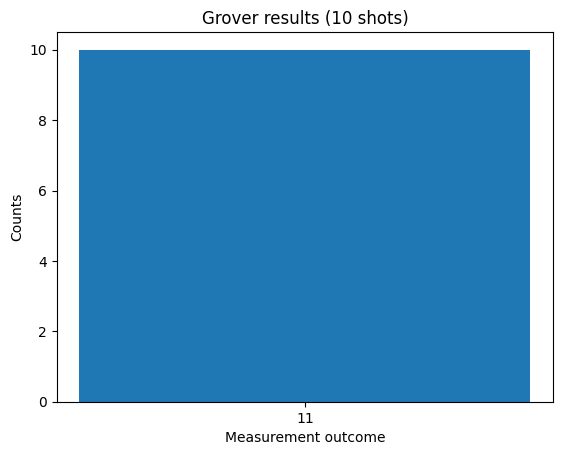

'\n# Convert measurement pairs → bitstrings\nbitstrings = [\'\'.join(map(str, p)) for p in pairs]\n\n# Get unique outcomes and their counts\nx = sorted(set(bitstrings))\ny = [bitstrings.count(v) for v in x]\n\n# Plot\nplt.bar(x, y)\nplt.xticks(x)\nplt.xlabel("Measurement outcome")\nplt.ylabel("Counts")\nplt.title(f"Measurement Histogram ({shots} shots)")\nplt.show()\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

shots = 10
results = []


ops = [
    {"operation": "create_circuit", "num_qubits": 2},
    {"operation": "set_state", "state": 0, "complex_value": {"re": 1, "im": 0}},

    {"operation": "gate", "gate": "hadamard", "q": 0},
    {"operation": "gate", "gate": "hadamard", "q": 1},

    # Oracle: mark |11> (CZ == cphase with theta=pi)
    {"operation": "gate", "gate": "cphase", "q_control": 0, "q_target": 1, "theta": np.pi},

    # Diffuser: H H, Z Z, CZ, H H 
    {"operation": "gate", "gate": "hadamard", "q": 0},
    {"operation": "gate", "gate": "hadamard", "q": 1},
    {"operation": "gate", "gate": "Z", "q": 0},
    {"operation": "gate", "gate": "Z", "q": 1},
    {"operation": "gate", "gate": "cphase", "q_control": 0, "q_target": 1, "theta": np.pi},
    {"operation": "gate", "gate": "hadamard", "q": 0},
    {"operation": "gate", "gate": "hadamard", "q": 1},

    {"operation": "measure", "lq2m": [0, 1], "count": shots},
    {"operation": "destroy_circuit"}
]

#measure_idx is the index of the measure operation in the list of operations, in 'ops'
measure_idx = next(i for i, op in enumerate(ops) if op["operation"] == "measure") #this finds the index of the measure operation in the list of operations, which we will use later to extract the measurement results from the response we get from the quokka after sending the batch of operations.

# Safety: remove unsupported 'count' if it exists anywhere
#not sure this is that necessary 
for op in ops:
    if op.get("operation") == "measure" and "count" in op:
        op.pop("count") #this removes the count key from the measure operation, since the Quokka does not support it in batch mode. We will handle the number of shots ourselves in the loop below.

# Print exactly what we will send for measurement
print("Measure operation being sent:", next(op for op in ops if op.get("operation") == "measure"))

for _ in range(shots):
    resp = requests.post(req_str, json=ops, verify=False)
    out = resp.json()
    # Check for errors in the response
    if isinstance(out, dict) and "error" in out:
        raise RuntimeError(out)

    # Extract measurement result using measure_idx
    meas_item = out[measure_idx]
    meas_val = meas_item["result"] if isinstance(meas_item, dict) else meas_item
    results.append(meas_val) #this appends the measurement result to the results list, which we will use later to analyse the measurement outcomes.

# Check for errors again after processing results, just in case
if isinstance(out, dict) and "error" in out: 
    print("Server error:", out)
    print("Measure op sent:", next(op for op in ops if op.get("operation") == "measure"))
    raise RuntimeError(out)

# ---- PRINT RESULTS ----
print("Raw measurement results (integers):")
print(results)

# Convert measurement integers to bitstrings (assuming 2 qubits, so we want 2-bit binary strings)
bitstrings = [format(int(r), "02b") for r in results]

print("Measurement results (bitstrings):")
for i, b in enumerate(bitstrings, start=1):
    print(f"Shot {i}: {b}")


x = sorted(set(bitstrings))
y = [bitstrings.count(v) for v in x]

plt.bar(x, y)
plt.xticks(x)
plt.xlabel("Measurement outcome")
plt.ylabel("Counts")
plt.title(f"Grover results ({shots} shots)")
plt.show()

